# Tables and Figures
Author: Mark Bauer

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import matplotlib.ticker as ticker
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cpi

plt.rcParams['savefig.facecolor'] = 'white'

In [2]:
ls data/

FimaNfipClaims.csv


In [3]:
# create a DuckDB database instance
con = duckdb.connect()

# create table claims of dataset
con.execute("""
    CREATE TABLE claims AS
        FROM read_csv('data/FimaNfipClaims.csv')
""")

# sanity check
con.sql("""
    SELECT *
    FROM claims
    LIMIT 5
""").show()

┌──────────────────────┬──────────────────────┬──────────────────────┬───┬──────────┬───────────┬──────────────────────┐
│ agricultureStructu…  │       asOfDate       │ basementEnclosureC…  │ … │ latitude │ longitude │          id          │
│        int64         │      timestamp       │        int64         │   │  double  │  double   │       varchar        │
├──────────────────────┼──────────────────────┼──────────────────────┼───┼──────────┼───────────┼──────────────────────┤
│                    0 │ 2020-11-13 14:50:3…  │                    2 │ … │     30.3 │     -87.7 │ e7af3d9f-b605-4653…  │
│                    0 │ 2020-12-11 16:25:4…  │                    0 │ … │     30.3 │     -87.7 │ bbaeaf64-c162-41bf…  │
│                    0 │ 2020-03-27 12:15:4…  │                    0 │ … │     33.5 │    -112.1 │ 256da746-b30b-4129…  │
│                    0 │ 2020-03-27 12:15:4…  │                    0 │ … │     33.5 │    -112.1 │ e3dcbb27-a2d0-4a9e…  │
│                    0 │ 2020-03

In [4]:
# list tables and schemas
con.sql("SHOW ALL TABLES").df()

,database,schema,name,column_names,column_types,temporary
0,memory,main,claims,"[agricultureStructureIndicator, asOfDate, base...","[BIGINT, TIMESTAMP, BIGINT, BIGINT, BIGINT, TI...",False


In [5]:
# count of rows
con.sql("""
    SELECT
        COUNT(*) AS count_rows
    FROM
        claims
""")

┌────────────┐
│ count_rows │
│   int64    │
├────────────┤
│    2671486 │
└────────────┘

In [6]:
# count of columns
con.sql("""
    SELECT
        COUNT(column_name) AS count_columns
    FROM
        (DESCRIBE FROM claims)
""")

┌───────────────┐
│ count_columns │
│     int64     │
├───────────────┤
│            73 │
└───────────────┘

In [7]:
# last refreshed
con.sql("""
    SELECT
        asOfDate
    FROM
        claims
    ORDER BY
        asOfDate DESC
    LIMIT 1
""")

┌─────────────────────────┐
│        asOfDate         │
│        timestamp        │
├─────────────────────────┤
│ 2024-10-04 00:59:55.552 │
└─────────────────────────┘

# Examine Dataset

## Column Info

In [8]:
# examine column datatypes
con.sql("""
    SELECT
        column_name,
        column_type
    FROM
        (DESCRIBE claims)
""").show(max_rows=80)

┌────────────────────────────────────────────┬─────────────┐
│                column_name                 │ column_type │
│                  varchar                   │   varchar   │
├────────────────────────────────────────────┼─────────────┤
│ agricultureStructureIndicator              │ BIGINT      │
│ asOfDate                                   │ TIMESTAMP   │
│ basementEnclosureCrawlspaceType            │ BIGINT      │
│ policyCount                                │ BIGINT      │
│ crsClassificationCode                      │ BIGINT      │
│ dateOfLoss                                 │ TIMESTAMP   │
│ elevatedBuildingIndicator                  │ BIGINT      │
│ elevationCertificateIndicator              │ VARCHAR     │
│ elevationDifference                        │ DOUBLE      │
│ baseFloodElevation                         │ DOUBLE      │
│ ratedFloodZone                             │ VARCHAR     │
│ houseWorship                               │ BIGINT      │
│ locationOfContents    

In [9]:
# approximate column null percentage
con.sql("""
    SELECT
        column_name,
        null_percentage
    FROM
        (SUMMARIZE FROM claims)
    WHERE
        null_percentage > 0
    ORDER BY
        null_percentage DESC
""").show(max_rows=80)

┌────────────────────────────────────────────┬─────────────────┐
│                column_name                 │ null_percentage │
│                  varchar                   │  decimal(9,2)   │
├────────────────────────────────────────────┼─────────────────┤
│ floodCharacteristicsIndicator              │           98.51 │
│ eventDesignationNumber                     │           94.34 │
│ lowestAdjacentGrade                        │           81.26 │
│ crsClassificationCode                      │           80.65 │
│ nonPaymentReasonBuilding                   │           78.02 │
│ elevationCertificateIndicator              │           77.72 │
│ lowestFloorElevation                       │           76.38 │
│ baseFloodElevation                         │           75.70 │
│ elevationDifference                        │           72.95 │
│ floodZoneCurrent                           │           72.15 │
│ nfipCommunityNumberCurrent                 │           72.10 │
│ nfipCommunityName      

## Preview Data

In [10]:
# preview data
con.sql("""
    SELECT *
    FROM claims
    LIMIT 5
""").show()

┌──────────────────────┬──────────────────────┬──────────────────────┬───┬──────────┬───────────┬──────────────────────┐
│ agricultureStructu…  │       asOfDate       │ basementEnclosureC…  │ … │ latitude │ longitude │          id          │
│        int64         │      timestamp       │        int64         │   │  double  │  double   │       varchar        │
├──────────────────────┼──────────────────────┼──────────────────────┼───┼──────────┼───────────┼──────────────────────┤
│                    0 │ 2020-11-13 14:50:3…  │                    2 │ … │     30.3 │     -87.7 │ e7af3d9f-b605-4653…  │
│                    0 │ 2020-12-11 16:25:4…  │                    0 │ … │     30.3 │     -87.7 │ bbaeaf64-c162-41bf…  │
│                    0 │ 2020-03-27 12:15:4…  │                    0 │ … │     33.5 │    -112.1 │ 256da746-b30b-4129…  │
│                    0 │ 2020-03-27 12:15:4…  │                    0 │ … │     33.5 │    -112.1 │ e3dcbb27-a2d0-4a9e…  │
│                    0 │ 2020-03

In [11]:
# preview data as pandas dataframe for readability
sql = """
    SELECT *
    FROM claims
    LIMIT 5
"""

# examine each column in sections because of large number of columns
con.sql(sql).df().iloc[:, :15]

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation
0,0,2020-11-13 14:50:38.288,2,1,NaN,2020-09-16,0,None,6.0,10.0,AE,0,NaN,0.0,16.0
1,0,2020-12-11 16:25:40.587,0,1,NaN,2020-09-16,1,None,4.0,10.0,AE,0,7.0,4.4,14.4
2,0,2020-03-27 12:15:45.887,0,1,NaN,2016-08-02,0,2,NaN,NaN,AH,0,3.0,NaN,NaN
3,0,2020-03-27 12:15:45.887,0,1,NaN,2014-09-08,0,2,NaN,NaN,AH,0,3.0,NaN,NaN
4,0,2020-03-26 12:56:27.476,0,1,NaN,2018-01-09,1,None,NaN,NaN,AE,0,NaN,NaN,NaN


In [12]:
# slice through columns
con.sql(sql).df().iloc[:, 15:30]

,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss
0,2,0,NaN,2,1975-01-01,2008-10-20,2695.44,0.0,0.0,1,8,0,7400,0,2020
1,3,0,54.0,1,1991-09-17,2017-10-05,2750.18,121.0,0.0,1,8,0,10800,700,2020
2,1,0,NaN,1,1949-01-01,2014-09-02,NaN,NaN,NaN,0,B,0,153500,15800,2016
3,1,0,NaN,1,1949-01-01,2014-09-02,25156.27,0.0,0.0,0,B,0,139500,15000,2014
4,1,0,10.0,1,1960-01-01,2001-08-05,NaN,NaN,NaN,0,1,0,250000,0,2018


In [13]:
# slice through columns
con.sql(sql).df().iloc[:, 30:45]

,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator
0,0,3945.0,F,2695.44,167531.0,1,N,0.0,None,0.0,0.0,0,AL0520,NaN,NaN
1,1,4000.0,F,2750.18,278027.0,1,N,1371.0,F,121.0,50000.0,0,AL0520,NaN,NaN
2,1,1698.0,5,0.00,140422.0,4,N,3690.0,5,0.0,21500.0,0,None,NaN,NaN
3,1,30098.0,5,25156.27,140919.0,4,N,NaN,5,0.0,NaN,0,None,NaN,NaN
4,1,NaN,2,0.00,NaN,4,N,NaN,0,0.0,NaN,0,None,368.0,NaN


In [14]:
# slice through columns
con.sql(sql).df().iloc[:, 45:60]

,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator
0,NaN,0,Hurricane Sally,30000,0.0,015005,0000,None,None,None,0,185457.0,0.0,A,0
1,NaN,0,Hurricane Sally,30000,0.0,015005,0000,None,None,None,0,314835.0,75000.0,A,0
2,0.0,0,None,30000,0.0,040051,0000,None,01,01,0,175528.0,0.0,R,0
3,0.0,0,None,30000,0.0,040051,0000,None,None,None,0,173974.0,NaN,R,0
4,0.0,0,Mid-Winter California Flooding,30000,0.0,060331,0000,None,None,06,0,NaN,NaN,A,0


In [15]:
# slice through columns
con.sql(sql).df().iloc[:, 60:]

,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,None,1,0,AL,Currently Unavailable,36542,01003,01003011407,010030114073,30.3,-87.7,e7af3d9f-b605-4653-958f-bc48f413766c
1,0,AE,1,0,AL,Currently Unavailable,36542,01003,01003011407,010030114072,30.3,-87.7,bbaeaf64-c162-41bf-a399-862d0e832447
2,1,None,1,0,AZ,Currently Unavailable,85015,04013,04013108902,040131089022,33.5,-112.1,256da746-b30b-4129-a391-93f50a6190c8
3,1,None,1,0,AZ,Currently Unavailable,85015,04013,04013108902,040131089022,33.5,-112.1,e3dcbb27-a2d0-4a9e-a70d-ff7e578d4e6a
4,0,AE,1,0,CA,Currently Unavailable,93108,06083,06083001402,060830014022,34.4,-119.6,f77efb94-0188-4fa0-b52e-3aa71499baeb


In [16]:
# earliest and latest record effective date
con.sql("""
    SELECT
        min(asOfDate) AS earliestAsOfDate,
        max(asOfDate) AS latestAsOfDate
    FROM
        claims
""").show()

┌─────────────────────────┬─────────────────────────┐
│    earliestAsOfDate     │     latestAsOfDate      │
│        timestamp        │        timestamp        │
├─────────────────────────┼─────────────────────────┤
│ 2019-09-19 06:12:43.388 │ 2024-10-04 00:59:55.552 │
└─────────────────────────┴─────────────────────────┘



In [17]:
# earliest and latest date of loss in dataset
con.sql("""
    SELECT
        min(dateOfLoss) AS earliestDateOfLoss,
        max(dateOfLoss) AS latestDateOfLoss
    FROM
        claims
""").show()

┌─────────────────────┬─────────────────────┐
│ earliestDateOfLoss  │  latestDateOfLoss   │
│      timestamp      │      timestamp      │
├─────────────────────┼─────────────────────┤
│ 1978-01-01 00:00:00 │ 2024-10-03 00:00:00 │
└─────────────────────┴─────────────────────┘



In [18]:
con.sql("""
    SELECT
        COUNT(id) AS countClaims,
        ROUND(
            SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim), 0)::BIGINT AS paidTotalClaim, 
        ROUND(SUM(amountPaidOnBuildingClaim), 0)::BIGINT AS paidBuildingClaim,
        ROUND(SUM(amountPaidOnContentsClaim), 0)::BIGINT AS paidContentsClaim, 
        ROUND(SUM(amountPaidOnIncreasedCostOfComplianceClaim), 0)::BIGINT AS paidICC
    FROM
        claims    
""").df()

,countClaims,paidTotalClaim,paidBuildingClaim,paidContentsClaim,paidICC
0,2671486,80638352603,65049593608,14640321888,948437107


In [19]:
summary_df = con.sql("""
    SELECT
        COUNT(id) / 1_000_000 AS countClaimsM,
        (SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim)) / 1_000_000 AS paidTotalClaimM, 
        SUM(amountPaidOnBuildingClaim) / 1_000_000 AS paidBuildingClaimM,
        SUM(amountPaidOnContentsClaim) / 1_000_000 AS paidContentsClaimM, 
        SUM(amountPaidOnIncreasedCostOfComplianceClaim) / 1_000_000 AS paidICCM
    FROM
        claims   
""").df()

print(summary_df.to_markdown(index=False))

|   countClaimsM |   paidTotalClaimM |   paidBuildingClaimM |   paidContentsClaimM |   paidICCM |
|---------------:|------------------:|---------------------:|---------------------:|-----------:|
|        2.67149 |           80638.4 |              65049.6 |              14640.3 |    948.437 |


In [20]:
year_loss_df = con.sql("""
    SELECT
        yearOfLoss,
        COUNT(id) AS countClaims,
        ROUND(
            SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim), 0)::BIGINT AS paidTotalClaim
    FROM
        claims 
    WHERE
        yearOfLoss < 2024
    GROUP BY
        yearOfLoss 
   ORDER BY
       yearOfLoss
""").df()

print(year_loss_df.shape)
year_loss_df.head()

(46, 3)


,yearOfLoss,countClaims,paidTotalClaim
0,1978,35897,147719253
1,1979,87375,483281219
2,1980,53227,230414295
3,1981,31174,127118031
4,1982,43106,198295820


In [21]:
year_loss_df["paidTotalClaim2023"] = year_loss_df.apply(
    lambda x: cpi.inflate(
        x.paidTotalClaim,
        x.yearOfLoss,
        to=2023),
    axis=1
)

year_loss_df = year_loss_df.assign(
    paidTotalClaimM = year_loss_df['paidTotalClaim'] / 1_000_000,
    paidTotalClaim2023M = year_loss_df['paidTotalClaim2023'] / 1_000_000
)

year_loss_df.head(10)

,yearOfLoss,countClaims,paidTotalClaim,paidTotalClaim2023,paidTotalClaimM,paidTotalClaim2023M
0,1978,35897,147719253,6.903428e+08,147.719253,690.342819
1,1979,87375,483281219,2.028330e+09,483.281219,2028.329945
2,1980,53227,230414295,8.520352e+08,230.414295,852.035152
3,1981,31174,127118031,4.261069e+08,127.118031,426.106912
4,1982,43106,198295820,6.261257e+08,198.295820,626.125730
5,1983,70446,439454937,1.344406e+09,439.454937,1344.405605
6,1984,39230,254642874,7.467776e+08,254.642874,746.777603
7,1985,52305,368238794,1.042780e+09,368.238794,1042.779712
8,1986,18783,126384255,3.513644e+08,126.384255,351.364373
9,1987,18724,105444344,2.828266e+08,105.444344,282.826607


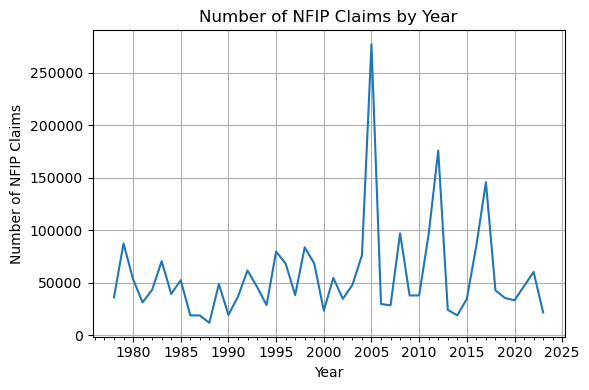

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=year_loss_df,
    x='yearOfLoss',
    y='countClaims',
    ax=ax
)

plt.title("Number of NFIP Claims by Year")
plt.xlabel("Year")
plt.ylabel("Number of NFIP Claims")

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/year-count.png', dpi=200, bbox_inches='tight')

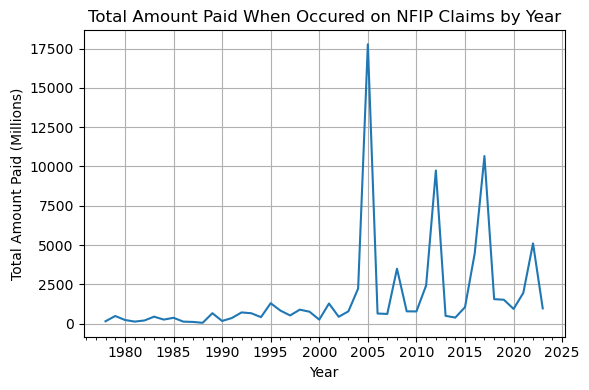

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=year_loss_df,
    x='yearOfLoss',
    y='paidTotalClaimM',
    ax=ax
)

plt.title("Total Amount Paid When Occured on NFIP Claims by Year")
plt.xlabel("Year")
plt.ylabel("Total Amount Paid (Millions)")

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.grid(True)

plt.tight_layout()

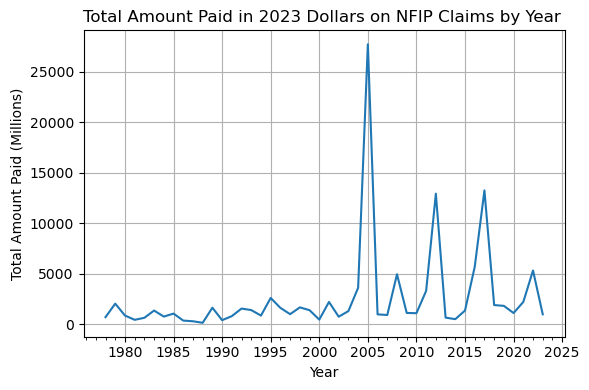

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=year_loss_df,
    x='yearOfLoss',
    y='paidTotalClaim2023M',
    ax=ax
)

plt.title("Total Amount Paid in 2023 Dollars on NFIP Claims by Year ")
plt.xlabel("Year")
plt.ylabel("Total Amount Paid (Millions)")

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.grid(True)

plt.tight_layout()
plt.savefig('figures/year-amount-paid.png', dpi=200, bbox_inches='tight')

# Top 10 Most Significant Flood Events By National Flood Insurance Program Payouts

In [25]:
event_df = con.sql("""
    SELECT
        yearOfLoss,
        floodEvent,
        COUNT(id) AS countClaims,
        ROUND(
            SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim), 0)::BIGINT AS paidTotalClaim
    FROM
        claims 
    WHERE
        floodEvent NOT NULL
        AND yearOfLoss < 2024
    GROUP BY
        yearOfLoss, floodEvent    
""").df()

print(event_df.shape)
event_df.head()

(224, 4)


,yearOfLoss,floodEvent,countClaims,paidTotalClaim
0,2011,Mid-spring storms,5414,146091747
1,2019,Tropical Storm Barry,1292,47259112
2,1994,Flooding,12315,269175458
3,2002,Hurricane Lili,4006,37341225
4,1988,Flooding,7163,33990402


In [26]:
event_df["paidTotalClaim2023"] = event_df.apply(
    lambda x: cpi.inflate(
        x.paidTotalClaim,
        x.yearOfLoss,
        to=2023),
    axis=1
)

event_df.head(10)

,yearOfLoss,floodEvent,countClaims,paidTotalClaim,paidTotalClaim2023
0,2011,Mid-spring storms,5414,146091747,1.978956e+08
1,2019,Tropical Storm Barry,1292,47259112,5.632526e+07
2,1994,Flooding,12315,269175458,5.534298e+08
3,2002,Hurricane Lili,4006,37341225,6.324595e+07
4,1988,Flooding,7163,33990402,8.754813e+07
5,2008,Hurricane Ike,58126,2702511916,3.824660e+09
6,2021,Tropical Storm Claudette,429,20220115,2.273724e+07
7,2011,Hurricane Irene,52493,1347399996,1.825186e+09
8,1993,Midwest Flooding,12152,272032191,5.736246e+08
9,2012,Late spring storms,85,1239630,1.645155e+06


In [27]:
event_df = (
    event_df
    .assign(
        paidTotalClaimM = event_df['paidTotalClaim'] / 1_000_000,
        paidTotalClaimM2023 = event_df['paidTotalClaim2023'] / 1_000_000,
        averageClaim2023 = event_df['paidTotalClaim2023'] / event_df['countClaims']
    )
    .astype({'paidTotalClaimM': int, 'paidTotalClaimM2023': int, 'averageClaim2023': int})
    .sort_values(by='paidTotalClaim2023', ascending=False)
    .head(10)
    .reset_index(drop=True) 
)

event_df['rank'] = range(1, 11)

cols = [
    'rank', 'yearOfLoss', 'floodEvent',
    'countClaims', 'paidTotalClaimM',
    'paidTotalClaimM2023', 'averageClaim2023'
]
 
event_df = event_df.loc[:, cols]

event_df

,rank,yearOfLoss,floodEvent,countClaims,paidTotalClaimM,paidTotalClaimM2023,averageClaim2023
0,1,2005,Hurricane Katrina,208348,16261,25371,121772
1,2,2012,Hurricane Sandy,144848,8956,11886,82062
2,3,2017,Hurricane Harvey,92396,9055,11256,121830
3,4,2022,Hurricane Ian,48721,4757,4953,101664
4,5,2008,Hurricane Ike,58126,2702,3824,65799
5,6,2016,Mid-summer severe storms,30017,2533,3216,107150
6,7,2004,Hurricane Ivan,20137,1325,2137,106170
7,8,2001,Tropical Storm Allison,35561,1104,1901,53461
8,9,2011,Hurricane Irene,52493,1347,1825,34770
9,10,2021,Hurricane Ida,28317,1346,1514,53480


In [28]:
print(event_df.to_markdown(index=False))

|   rank |   yearOfLoss | floodEvent               |   countClaims |   paidTotalClaimM |   paidTotalClaimM2023 |   averageClaim2023 |
|-------:|-------------:|:-------------------------|--------------:|------------------:|----------------------:|-------------------:|
|      1 |         2005 | Hurricane Katrina        |        208348 |             16261 |                 25371 |             121772 |
|      2 |         2012 | Hurricane Sandy          |        144848 |              8956 |                 11886 |              82062 |
|      3 |         2017 | Hurricane Harvey         |         92396 |              9055 |                 11256 |             121830 |
|      4 |         2022 | Hurricane Ian            |         48721 |              4757 |                  4953 |             101664 |
|      5 |         2008 | Hurricane Ike            |         58126 |              2702 |                  3824 |              65799 |
|      6 |         2016 | Mid-summer severe storms |         3

# Map

In [29]:
state_loss_df = con.sql("""
    SELECT
        state,
        COUNT(id) AS countClaim
    FROM
        claims  
    GROUP BY
        state
    ORDER BY
        state ASC  
""").df()

print(state_loss_df.shape)
state_loss_df.head()

(57, 2)


,state,countClaim
0,AK,766
1,AL,44754
2,AR,9972
3,AS,29
4,AZ,5259


In [30]:
# read states shapefile
path = 'https://www2.census.gov/geo/tiger/TIGER2023/STATE/tl_2023_us_state.zip'
states_gdf = gpd.read_file(path)

# sanity check
print(states_gdf.shape)
states_gdf.head()

(56, 16)


,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [31]:
# identify CRS
states_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [32]:
# merge public assistance dollars to state boundaries
states_merged = states_gdf.merge(
    state_loss_df,
    left_on='STUSPS',
    right_on='state',
    how='left'
)

# sanity check
states_merged.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state,countClaim
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",WV,27384
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",FL,415410
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",IL,52426
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",MN,12449
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",MD,25192


In [33]:
# examine NULLS count
states_merged.loc[states_merged['state'].isnull()]

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state,countClaim


In [34]:
# calculate clount claims per kilometer
# convert land area (sq meters) to sq kilometers
states_merged['countClaimkm'] = states_merged['countClaim'] / (states_merged['ALAND'] / 1_000_000)

states_merged.head().iloc[:, :]

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state,countClaim,countClaimkm
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",WV,27384,0.439787
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",FL,415410,2.989340
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",IL,52426,0.364631
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",MN,12449,0.060360
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",MD,25192,1.001601


In [35]:
# locate conus only gdf
conus_gdf = states_merged.loc[
    (states_merged['GEOID'].astype(int) <= 56)
    & (~states_merged['GEOID'].isin(['02', '15']))
]

# transform CRS
conus_gdf = conus_gdf.to_crs(5070)

conus_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state,countClaim,countClaimkm
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((1548777.304 1961418.875, 1548791.323...",WV,27384,0.439787
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((1318717.052 267177.248, 131868...",FL,415410,2.989340
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((701650.471 1724476.457, 701575.841 1...",IL,52426,0.364631
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((50386.396 2888284.096, 50544.128 288...",MN,12449,0.060360
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((1718035.440 1986172.419, 1718118.217...",MD,25192,1.001601


In [36]:
# identify bounds of map
conus_gdf['countClaim'].describe()

count        49.000000
mean      53457.326531
std      105594.696109
min         486.000000
25%        5725.000000
50%       14706.000000
75%       49288.000000
max      483956.000000
Name: countClaim, dtype: float64

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_44807/3665731800.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


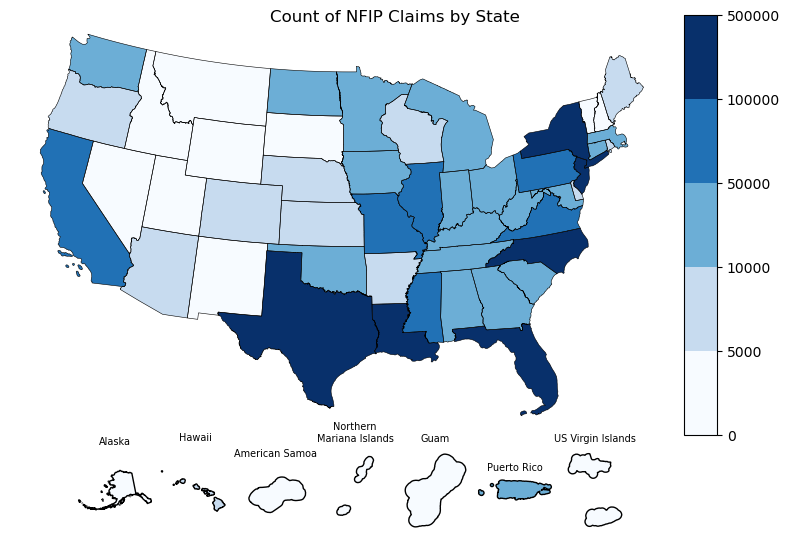

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm(
    [0, 5000, 10000, 50000, 100000, 500000],
    cmap.N
)

# plot conus values
conus_gdf.plot(
    column='countClaim',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax,
)

# plot conus shapes
conus_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.4,
)

# add axes for non-conus states
alaska = fig.add_axes([.10, 0.1, 0.1, 0.1])
hawaii = fig.add_axes([.20, 0.1, 0.1, 0.1])
ams = fig.add_axes([.30, 0.1, 0.1, 0.1])
mp = fig.add_axes([.40, 0.1, 0.1, 0.1])
gu = fig.add_axes([.50, 0.1, 0.1, 0.1])
pr = fig.add_axes([.60, 0.1, 0.1, 0.1])
vi = fig.add_axes([.70, 0.1, 0.1, 0.1])

# function to plot non-conus states
def plot_states(geoid, crs, ax, title):
    (states_merged
    .loc[states_merged['GEOID'].isin([geoid])]
    .to_crs(crs)
    .plot(
        column='countClaim',
        legend=True,
        cmap=cmap,
        cax=cax,
        norm=norm,
        ax=ax,
        edgecolor='black'
    )
    .set_title(title, fontsize=7)
    )
    
# plot non-conus states    
plot_states('02', 3338, alaska, 'Alaska')   
plot_states('15', 3760, hawaii, 'Hawaii')  
plot_states('60', 3102, ams, 'American Samoa')  
plot_states('69', 3993, mp, 'Northern\nMariana Islands')
plot_states('66', 3993, gu, 'Guam') 
plot_states('72', 4326, pr, 'Puerto Rico')  
plot_states('78', 3991, vi, 'US Virgin Islands') 
  
# axis aesthetics
ax.axis('off')
ams.axis('off')
ams.set_xlim(left=150_000, right=350_000)
ams.set_ylim(bottom=250_000, top=375_000)
gu.axis('off')
mp.axis('off')
mp.set_ylim(bottom=None, top=275_000)
pr.axis('off')
vi.axis('off')
hawaii.axis('off')
hawaii.set_xlim(50000)
hawaii.set_ylim(bottom=None, top=1000000)
alaska.axis('off')

fig.suptitle('Count of NFIP Claims by State', y=.75)
fig.tight_layout()

In [38]:
# identify bounds of map
conus_gdf['countClaimkm'].describe()

count    49.000000
mean      0.794238
std       1.714266
min       0.002215
25%       0.060360
50%       0.161032
75%       0.632985
max      10.563917
Name: countClaimkm, dtype: float64

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_44807/3971936637.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


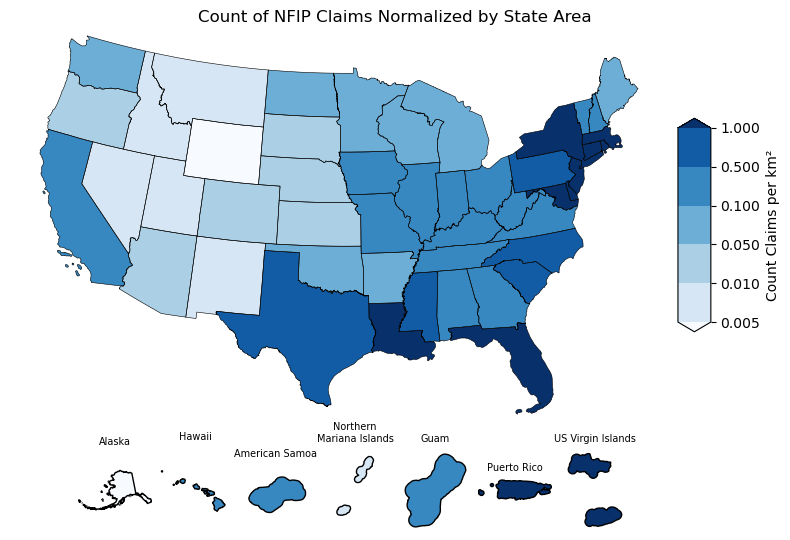

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm(
    [0.005, 0.010, 0.050, 0.100, 0.500, 1],
    cmap.N, extend='both'
)

# plot conus values
conus_gdf.plot(
    column='countClaimkm',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax,
)

# plot conus shapes
conus_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.4,
)

# add axes for non-conus states
alaska = fig.add_axes([.10, 0.1, 0.1, 0.1])
hawaii = fig.add_axes([.20, 0.1, 0.1, 0.1])
ams = fig.add_axes([.30, 0.1, 0.1, 0.1])
mp = fig.add_axes([.40, 0.1, 0.1, 0.1])
gu = fig.add_axes([.50, 0.1, 0.1, 0.1])
pr = fig.add_axes([.60, 0.1, 0.1, 0.1])
vi = fig.add_axes([.70, 0.1, 0.1, 0.1])

# function to plot non-conus states
def plot_states(geoid, crs, ax, title):
    (states_merged
    .loc[states_merged['GEOID'].isin([geoid])]
    .to_crs(crs)
    .plot(
        column='countClaimkm',
        legend=True,
        cmap=cmap,
        cax=cax,
        norm=norm,
        ax=ax,
        edgecolor='black'
    )
    .set_title(title, fontsize=7)
    )
    
# plot non-conus states    
plot_states('02', 3338, alaska, 'Alaska')   
plot_states('15', 3760, hawaii, 'Hawaii')  
plot_states('60', 3102, ams, 'American Samoa')  
plot_states('69', 3993, mp, 'Northern\nMariana Islands')
plot_states('66', 3993, gu, 'Guam') 
plot_states('72', 4326, pr, 'Puerto Rico')  
plot_states('78', 3991, vi, 'US Virgin Islands') 
  
# axis aesthetics
ax.axis('off')
ams.axis('off')
ams.set_xlim(left=150_000, right=350_000)
ams.set_ylim(bottom=250_000, top=375_000)
gu.axis('off')
mp.axis('off')
mp.set_ylim(bottom=None, top=275_000)
pr.axis('off')
vi.axis('off')
hawaii.axis('off')
hawaii.set_xlim(50000)
hawaii.set_ylim(bottom=None, top=1000000)
alaska.axis('off')

cax.set_ylabel('Count Claims per km\u00B2')

fig.suptitle('Count of NFIP Claims Normalized by State Area', y=.75)
fig.tight_layout()
fig.savefig('figures/count-claims-norm-map.png', dpi=200, bbox_inches='tight')